In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [27]:
# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=2)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
max_depth_values = range(1, 21)
train_accuracy = []
test_accuracy = []

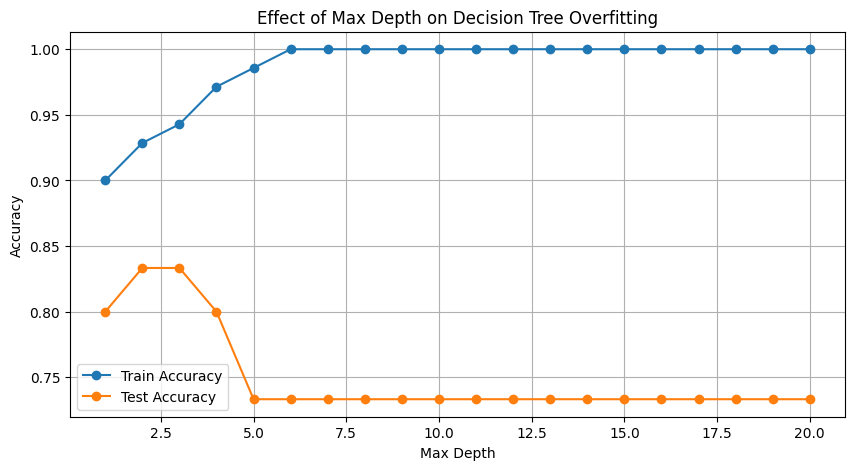

In [30]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the effect of max_depth on overfitting
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Decision Tree Overfitting')
plt.legend()
plt.grid(True)
plt.show()

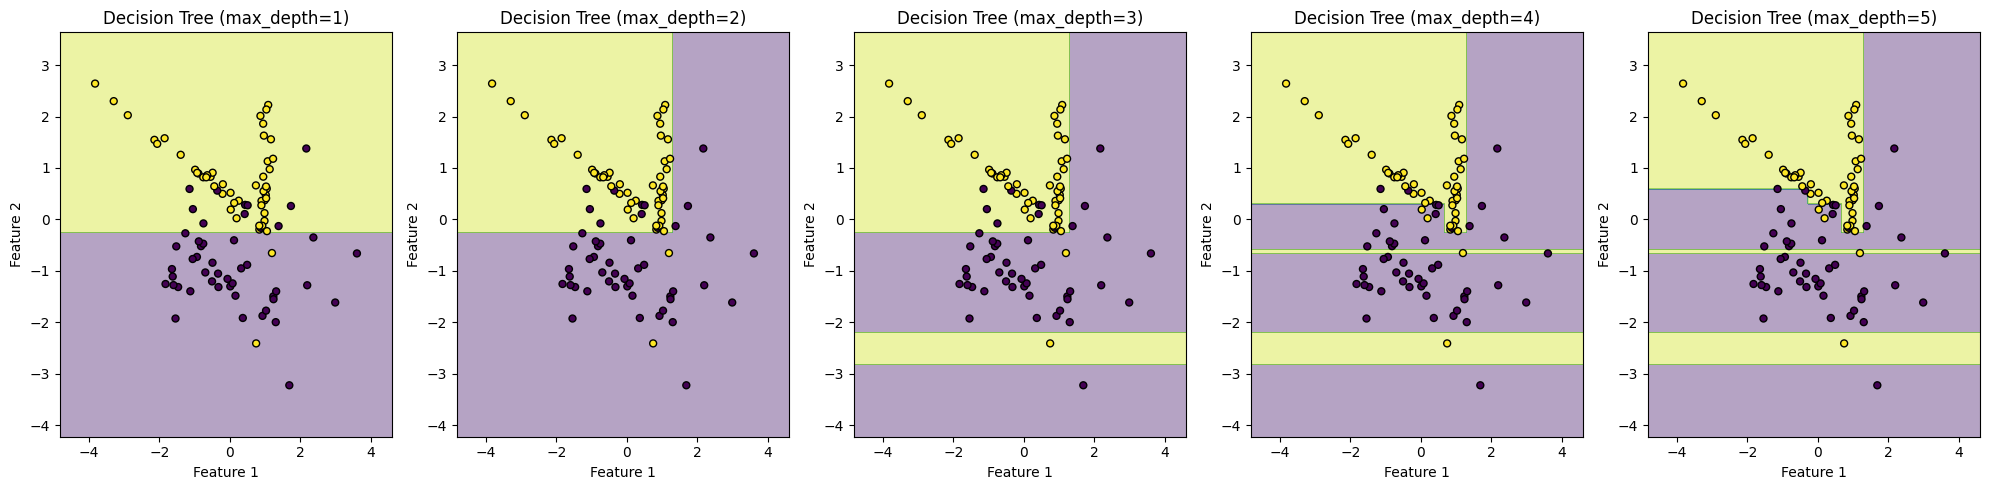

In [37]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Define a function to plot decision boundaries
def plot_decision_boundary(clf, ax, title):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k')
    ax.set_title(title)

clf_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf_depth_1.fit(X, y)

clf_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_depth_2.fit(X, y)

clf_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth_3.fit(X, y)

clf_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_depth_4.fit(X, y)

# Create Decision Trees with max_depth 5 and 4
clf_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_depth_5.fit(X, y)

# Create subplots to visualize the decision boundaries
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Plot decision boundaries for max_depth 1
plot_decision_boundary(clf_depth_1, axes[0], 'Decision Tree (max_depth=1)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot decision boundaries for max_depth 2
plot_decision_boundary(clf_depth_2, axes[1], 'Decision Tree (max_depth=2)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Plot decision boundaries for max_depth 3
plot_decision_boundary(clf_depth_3, axes[2], 'Decision Tree (max_depth=3)')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

# Plot decision boundaries for max_depth 4
plot_decision_boundary(clf_depth_4, axes[3], 'Decision Tree (max_depth=4)')
axes[3].set_xlabel('Feature 1')
axes[3].set_ylabel('Feature 2')

# Plot decision boundaries for max_depth 5
plot_decision_boundary(clf_depth_5, axes[4], 'Decision Tree (max_depth=5)')
axes[4].set_xlabel('Feature 1')
axes[4].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

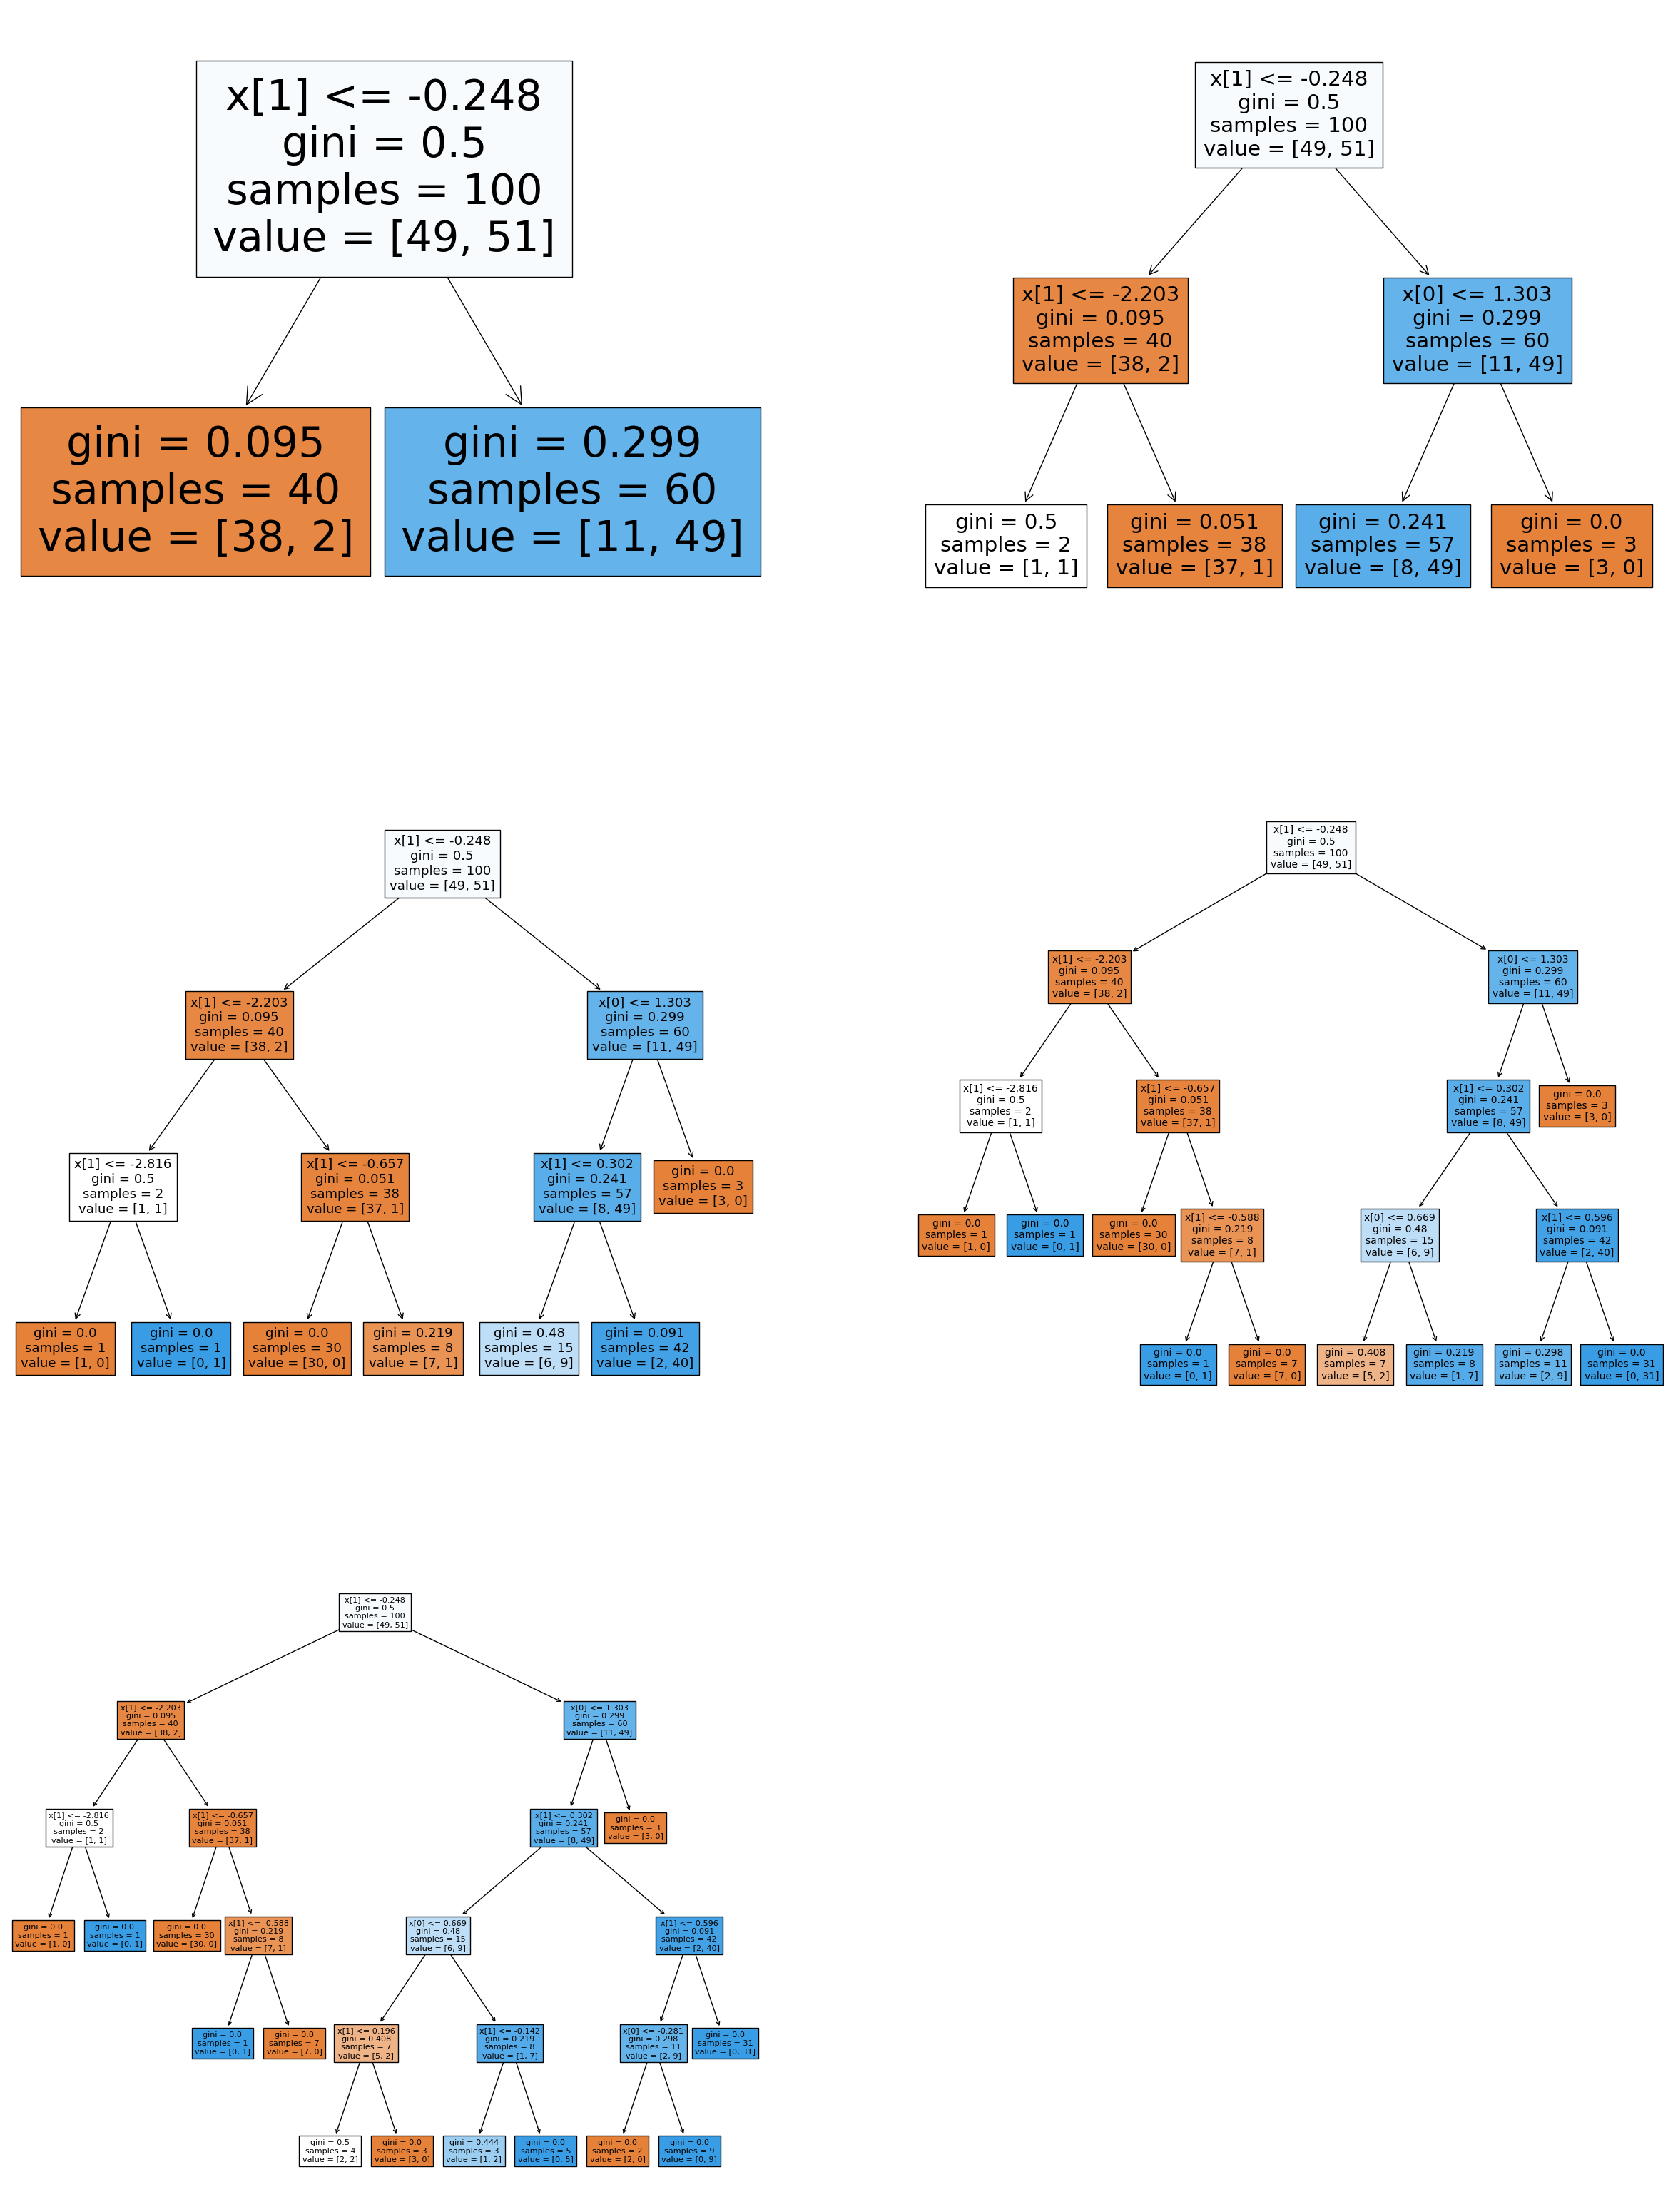

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(30, 40))
for i in range(5):
    plot_tree(eval(f'clf_depth_{i+1}'), filled=True, ax=axes[i//2, i%2])
plt.delaxes(axes[-1, -1])
plt.show()